# Regresja

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn import  metrics
from statsmodels.formula.api import ols

Rozważmy zbiór Boston

In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]


In [13]:
print(boston.keys())
print(boston.shape)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(1012, 11)


In [32]:
#bos=pd.DataFrame(boston.data)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
bos=pd.DataFrame(data)
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
bos.columns = feature_name

In [27]:
print(target[0:5])
bos['PRICE']=target
bos.head()

[24.  21.6 34.7 33.4 36.2]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
model = ols("PRICE ~ CRIM + ZN + I(2**INDUS) + ZN:INDUS+ I(INDUS ** 2.0)", bos).fit()
# Print the summary
print((model.summary()))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     39.05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           7.30e-34
Time:                        14:56:28   Log-Likelihood:                -1756.8
No. Observations:                 506   AIC:                             3526.
Df Residuals:                     500   BIC:                             3551.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.9918      0.643     

In [19]:
metrics.r2_score(bos.PRICE, model.predict(bos))

0.2808310234784849

# Zadanie - konkurs

Wykonaj regresję za pomocą metody **statsmodels.formula.api.ols** tak by wynik na zbiorze testowym był jak najlepszy.


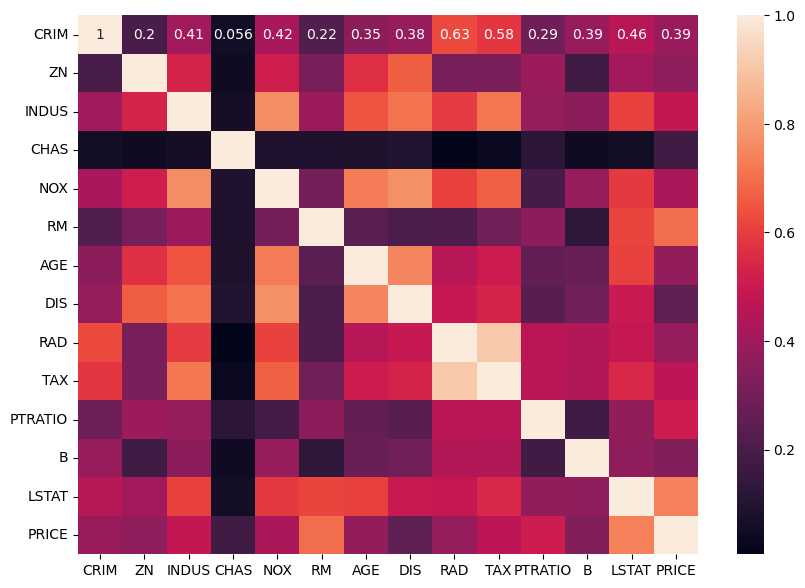

In [154]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(bos.corr().abs(), annot=True);

<Axes: xlabel='RM', ylabel='PRICE'>

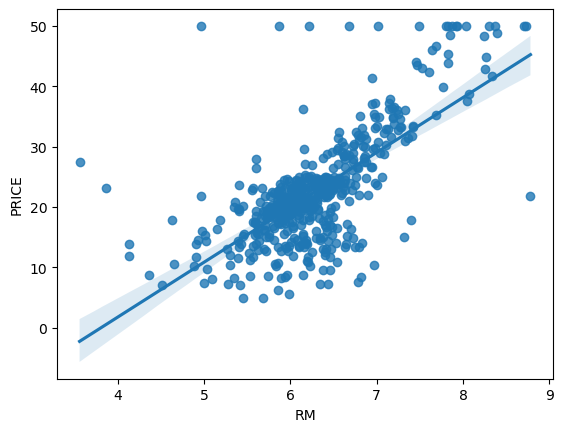

In [155]:
sns.regplot(y=bos.PRICE, x=bos.RM);

In [153]:
model = ols("PRICE ~ RM + I(RM ** 2.0) + I(RM ** 14.0) + I(LSTAT ** 2.0) + I(2**RM) + RM:LSTAT + DIS + PTRATIO", bos).fit()
print((model.summary()))
metrics.r2_score(bos.PRICE, model.predict(bos))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     246.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.62e-168
Time:                        15:57:59   Log-Likelihood:                -1434.3
No. Observations:                 506   AIC:                             2887.
Df Residuals:                     497   BIC:                             2925.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -43.8681     29.966     

0.7989779719364705